# Packages

In [1]:
import datetime
import math
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

What is the information that I want in this notebook?
- Full historical weight trends
- Some sort of average trend (e.g. weekly average) in recent months
- Weekly weight deltas
- A table of recent weights

# Working with dates and times

I need to get familiar with all of these python date and time objects. There's this datetime package, which is base python. But then there's pandas date time? And I think numpy date time too? And they all have different functions.

The basic date and time package in python is datetime. It contains different **Objects**. These are **timedelta**, **date**, **datetime**, **time**, **tzinfo**, and **timezone**. Most of the functionality in this package is wrapped up in these objects. 

In [2]:
import datetime

# `date` objects contain information about year, month, and day, but no time. 

# Get the date object for today
today = datetime.date.today()

# This is a class datetime.date object
print(type(today))

# The date contains year, month, day
print(today)

# The individual components are stored as attributes
print(today.year)
print(today.month)
print(today.day)

# The weekday (start at 0 for Monday) can be extracted 
# using the weekday() method
print(today.weekday())

<class 'datetime.date'>
2024-11-07
2024
11
7
3


In [3]:
# `time` objects contain information about hours, minutes, second, and microseconds, but no date information
# Not sure what the utility of this is yet. 

In [4]:
# 'datetime' objects contain the information from both the date and time objects

# Today as a datetime object
today = datetime.datetime.today()

# This is a datetime object
print(type(today))

# The datetime contains date information, as well as time
print(today)

# Individual date components can be extracted
print(today.year)

# As well as time components
print(today.second)
print(today.microsecond)

# The weekday method also exists
print(today.weekday())

<class 'datetime.datetime'>
2024-11-07 11:58:50.981124
2024
50
981124
3


In [5]:
# Comparions between dates lead to timedeltas

# Two moments
moment_1 = datetime.datetime.today()
moment_2 = datetime.datetime.today()

# Subtracting datetime objects creates a timedelta object
# Note that addition doesn't work on datetime objects.
moment_delta = moment_2 - moment_1

print(type(moment_delta))
print(moment_delta)

<class 'datetime.timedelta'>
0:00:00.000081


In [6]:
# We can create our own time deltas
# Note that the largest unit we can use in this case is weeks, 
# since months and years are ambiguous in terms of time intervals
# Create a timedelta of 2 days. 
delta = datetime.timedelta(days = 2)
print("Type of delta: {}".format(type(delta)))
print("Value of delta: {}".format(delta))

# We can then add or subtract timedeltas from datetime objects.
today = datetime.datetime.today()
print("Value of today: {}".format(today))
print("Value of today - delta: {}".format(today - delta))
print("Value of today + delta: {}".format(today + delta))
# Notice that the time information is the same, since we haven't specified 
# a time interval in our timedelta.

# A timedelta applied to a datetime returns a datetime
print("Type of today - delta: {}".format(type(today - delta)))

# Timedeltas can include changes to multiple units
delta = datetime.timedelta(days = 2, hours = 4)
print(delta)
print(today + delta)

Type of delta: <class 'datetime.timedelta'>
Value of delta: 2 days, 0:00:00
Value of today: 2024-11-07 11:58:53.501522
Value of today - delta: 2024-11-05 11:58:53.501522
Value of today + delta: 2024-11-09 11:58:53.501522
Type of today - delta: <class 'datetime.datetime'>
2 days, 4:00:00
2024-11-09 15:58:53.501522


How do timedeltas work with date objects?

In [7]:
# Create a date object for today. No time information.
today = datetime.date.today()
print(today)

# Timedelta of 2 days
delta = datetime.timedelta(days = 2)

# This works fine. Returns a date
print(today - delta)
print(type(today - delta))

# What if we include time?
delta = datetime.timedelta(days = 2, hours = 4)
print(today - delta)
print(type(today - delta))
# So the time information is thrown out and it acts only on the date information

delta = datetime.timedelta(hours = 4)
print(today - delta)

2024-11-07
2024-11-05
<class 'datetime.date'>
2024-11-05
<class 'datetime.date'>
2024-11-07


Can we convert datetimes into dates, or vice-versa?

In [8]:
# Create a datetime object for now
today = datetime.datetime.today()

# The date and time components can be extracted separately
print(today.date())
print(today.time())

# And they are converted to the appropriate objects
print(type(today.date()))
print(type(today.time()))

2024-11-07
11:58:56.777872
<class 'datetime.date'>
<class 'datetime.time'>


Okay this makes sense, but I doubt this can be vectorized. Although I can probably use list comprehensions. 

In [ ]:
day_range = range(30)

deltas = [datetime.timedelta(days = day) for day in day_range]
print(deltas[:5])

today = datetime.date.today()

list_of_days = [today - td for td in deltas]
print(list_of_days[:5])

Okay that works as expected. In order to vectorize though I would have to use NumPy or Pandas. 

In [ ]:
# This seems to work. Not sure if it's the right way though.
np.array(list_of_days) + datetime.timedelta(days = 2)

In [ ]:
# Data directory
data_dir = 'data'

# Data file
file = 'AppleHealth_BodyMass.csv'
file = os.path.join(data_dir, file)
if not os.path.exists(file):
    raise ValueError

# Import data
df_weight = pd.read_csv(file)

# Drop the first entry and select desired columns
df_weight = df_weight.loc[1:,['sourceName','unit','startDate', 'value']]

# Rename columns
df_weight = df_weight.rename(columns = {'sourceName':'Source', 
                                        'unit':'Unit',
                                        'startDate':'Date', 
                                        'value':'Weight'})

df_weight.head()

Dates are imported as strings initally. I'm not sure if datetime has functionality to parse strings as dates. But Pandas seems to.

In [ ]:
pd.to_datetime(df_weight['Date']).head()

In [ ]:
datetime.date(pd.to_datetime(df_weight['Date']))

This doesn't work because the datetime methods aren't vectorized. It's different, right? The datetime objects are classes, which works with lists etc., but not with pandas. What we need is a data type that is a date. And I guess there's some version of that built into pandas (and numpy).

# Analysis

In [42]:
# Data directory
data_dir = 'data'

# Data file
file = 'AppleHealth_BodyMass.csv'
file = os.path.join(data_dir, file)
if not os.path.exists(file):
    raise ValueError

# Import data
df_weight = pd.read_csv(file)

# Drop the first entry and select desired columns
df_weight = df_weight.loc[1:,['sourceName','unit','startDate', 'value']]

# Rename columns
df_weight = df_weight.rename(columns = {'sourceName':'Source', 
                                        'unit':'Unit',
                                        'startDate':'Date', 
                                        'value':'Weight'})

# Convert date to Pandas DateTime
df_weight['Date'] = pd.to_datetime(df_weight['Date'])

# Remove timezone information and floor dates to day
df_weight['Date'] = df_weight['Date'].dt.tz_localize(None).dt.floor('D')

# Set the date as index and sort
df_weight = df_weight.set_index('Date', drop = False).sort_index()

# Extract only MyFitnessPal entries. 
# Setup is currently such that MyFitnessPal reads data from Hevy
df_weight = df_weight.loc[df_weight['Source'] == 'MyFitnessPal']

# Drop duplicate entries
df_weight = df_weight.drop_duplicates()

df_weight.tail()

,Source,Unit,Date,Weight
Date,,,,
2024-11-03,MyFitnessPal,lb,2024-11-03,141.4
2024-11-04,MyFitnessPal,lb,2024-11-04,141.4
2024-11-05,MyFitnessPal,lb,2024-11-05,142.2
2024-11-06,MyFitnessPal,lb,2024-11-06,141.4
2024-11-07,MyFitnessPal,lb,2024-11-07,140.4


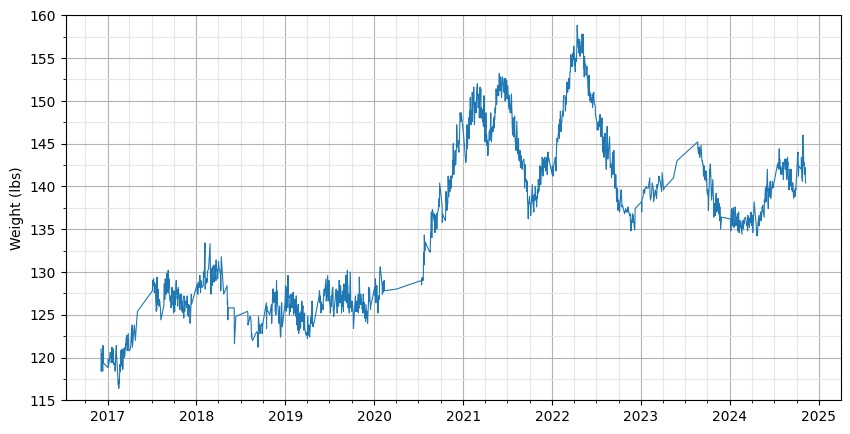

In [43]:
# Set a default style to use
plt.style.use('default')

# Generate the figure and axes. 
# This is a single set of axes in a figure with width 10 and height 5
fig, ax = plt.subplots(figsize = (10, 5))

# Generate the line plot
lines = ax.plot('Date', 'Weight', data = df_weight, lw = 0.80)

# This puts the grid below the data
ax.set_axisbelow(True)

# x-axis ticks
# x-axis tick locations
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval = 3))

# x-axis tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# y-axis ticks
ax.set_yticks(np.arange(110, 160.1, 5))
ax.set_yticks(np.arange(110, 160.1, 2.5), minor = True)
ax.set_ylim(115, 160)

# Plot grids
ax.grid(visible = True, which = 'major', color = '0.7')
ax.grid(visible = True, which = 'minor', axis = 'both', color = '0.90')

# Axis labels
ax.set_ylabel("Weight (lbs)");

How do I aggregate data?

In [44]:
# Move index into column
df_weight['Date'] = df_weight.index

# Create a new column containing the starting day of the week
# How does this work? 
# df_weight['Date'].dt.dayofweek extracts the day of the week from the date object. Starts at 0 for Monday.
# Then pd.to_timedelta(unit = 'd') converts those values into TimeDeltas. So day of week 0 becomes a TimeDelta of 0.
# If the unit is something else, it converts the values into TimeDeltas at that unit. So unit = 'm' would 
# convert it into TimeDeltas of minutes. But it's just taking the values in the column. So those where 
# the day of week returned 1 would be converted into a TimeDelta of 1 minute. We want the TimeDeltas 
# to count days, so we use unit = 'd'.
# Then subtracting those TimeDeltas from the date values works to floor every date to the start of the
# week.
df_weight['WeekStart'] = df_weight['Date'] - pd.to_timedelta(df_weight['Date'].dt.dayofweek, unit = 'd')

# Calculate the weekly average
# The syntax here is different from R. 
# groupby specifies which column to group by
# But then we select the column to aggregate by, and chain it with a method
# The output is a Pandas Series, not a DataFrame
weight_weekly = df_weight.groupby('WeekStart')['Weight'].mean()

# Convert Series to DataFrame
df_weight_weekly = pd.DataFrame({'Date':weight_weekly.index, 'Weight':weight_weekly.values})

# Examine
df_weight_weekly.head()

,Date,Weight
0,2016-12-05,119.942857
1,2016-12-12,119.733333
2,2017-01-02,119.200000
3,2017-01-09,120.200000
4,2017-01-16,120.200000


In [45]:
# Today's date
today = datetime.date.today()

# Number of months past
nmonths = 6

# Get the date 6 months ago
six_months_ago = today - datetime.timedelta(days = 30*nmonths)

# Get entries after 6 months ago
weight_weekly_recent = weight_weekly.truncate(before = six_months_ago)

# Rebuild the weekly data frame
df_weight_weekly = pd.DataFrame({'Date':weight_weekly_recent.index,
                                 'Weight':weight_weekly_recent.values})

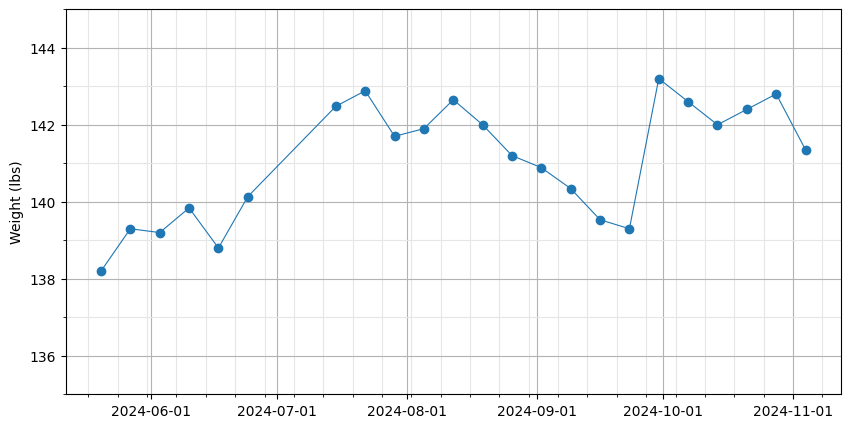

In [56]:
# Get min and max weights over the period
weight_min = min(df_weight_weekly['Weight'])
weight_max = max(df_weight_weekly['Weight'])

# Compute y-limits from min/max weights
ylim_min = math.floor(weight_min/5) * 5 
ylim_max = math.ceil(weight_max/5) * 5 

# Generate the figure and axes. 
# This is a single set of axes in a figure with width 10 and height 5
fig, ax = plt.subplots(figsize = (10, 5))

# Generate the line plot
lines = ax.plot('Date', 'Weight', data = df_weight_weekly, lw = 0.80)
points = ax.scatter('Date', 'Weight', data = df_weight_weekly)

# This puts the grid below the data
ax.set_axisbelow(True)

# x-axis ticks
# x-axis tick locations
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval = 7))

# x-axis tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Set y-ticks and limits
ax.set_yticks(np.arange(110, 160.1, 2))
ax.set_yticks(np.arange(110, 160.1, 1), minor = True)
ax.set_ylim(ylim_min, ylim_max)

# Plot grids
ax.grid(visible = True, which = 'major', color = '0.7')
ax.grid(visible = True, which = 'minor', axis = 'both', color = '0.90')

ax.set_ylabel("Weight (lbs)");

There's data missing here that I need to figure out. I think I filtered it out with the import when I selected the Hevy data. 

Next is how do I compute the weekly deltas?

In [48]:
# Compute weight differences successive rows
df_weight_diff = df_weight_weekly.diff().rename(columns = {'Date':'Timelapse', 'Weight':'Difference'})

# Concatenate weight difference data to weight averages
df_weight_diff = pd.concat([df_weight_weekly, df_weight_diff], axis = 1)

# Remove first entry (which is NA)
df_weight_diff = df_weight_diff[1:]

df_weight_diff

,Date,Weight,Timelapse,Difference
1,2024-05-27,139.300000,7 days,1.100000
2,2024-06-03,139.200000,7 days,-0.100000
3,2024-06-10,139.840000,7 days,0.640000
4,2024-06-17,138.800000,7 days,-1.040000
5,2024-06-24,140.133333,7 days,1.333333
6,2024-07-15,142.480000,21 days,2.346667
7,2024-07-22,142.883333,7 days,0.403333
8,2024-07-29,141.700000,7 days,-1.183333
9,2024-08-05,141.900000,7 days,0.200000
10,2024-08-12,142.650000,7 days,0.750000


In [49]:
# bar_colors = np.empty(len(df_weight_diff), dtype = "<U10")
# posdiff = df_weight_diff['Difference'] >= 0
# bar_colors[posdiff] = 'green'
# bar_colors[~posdiff] = 'red'

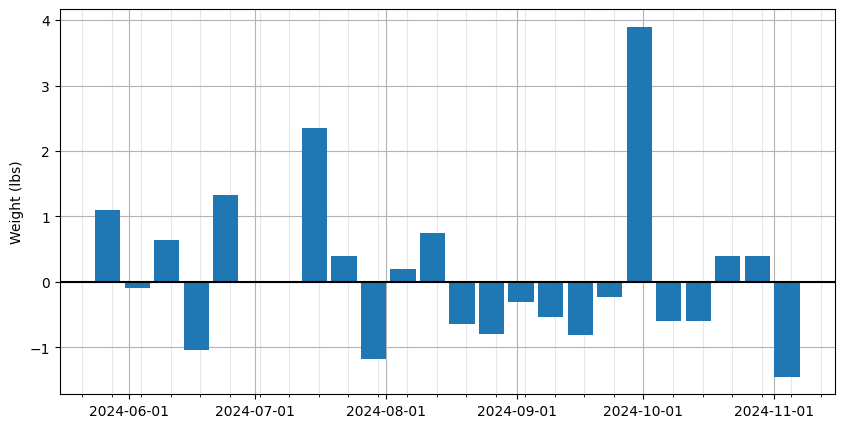

In [53]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar('Date', 'Difference', 
       data = df_weight_diff,
       # color = bar_colors,
       align = 'center', 
       width = datetime.timedelta(days = 6))

# Horizontal line at y = 0
ax.axhline(y = 0, color = 'black')

# This puts the grid below the data
ax.set_axisbelow(True)

# x-axis ticks
# x-axis tick locations
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval = 7))

# x-axis tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# ax.set_yticks(np.arange(-5, 6))
# ax.set_yticks(np.arange(-5, 6, 0.5), minor = True)

ax.grid(visible = True, which = 'major', color = '0.7')
ax.grid(visible = True, which = 'minor', axis = 'both', color = '0.90')

ax.set_ylabel('Weight (lbs)');

In [60]:
df_weight_diff.sort_values(by = 'Date').tail(n = 8)

,Date,Weight,Timelapse,Difference
15,2024-09-16,139.533333,7 days,-0.809524
16,2024-09-23,139.300000,7 days,-0.233333
17,2024-09-30,143.200000,7 days,3.900000
18,2024-10-07,142.600000,7 days,-0.600000
19,2024-10-14,142.000000,7 days,-0.600000
20,2024-10-21,142.400000,7 days,0.400000
21,2024-10-28,142.800000,7 days,0.400000
22,2024-11-04,141.350000,7 days,-1.450000
